<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_03_VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 03 - VARIATIONAL AUTO ENCODER (VAE)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 3 – VARIATIONAL AUTO ENCODER (VAE)

1. Selecionar 2 datasets (rotulados)

2. Treinar modelos VAEs:

  2.1. Ajustar o melhor modelo (topologia) segundo a
função de custo (conjunto validação)

3. Explorar o espaço latente:

  3.1. Gerar gráficos com a projeção do espaço latente
em 2D (PCA)

  3.2 Usar os rótulos na projeção

### Algumas questões:

1. Há formação de clusters no espaço latente?

2. Há separação dos rótulos no espaço latente?

3. A projeção ilustra quanto da variância?

**Adicional (opcional)**: Enviesar a formação do
espaço latente com os exemplos rotulados


# Introduction 


<img src="https://uploads-ssl.webflow.com/5fff737782367c2909ecca82/602e565b1047f73f66f60f73_s-vae-gifs.gif">

font: https://en.wikipedia.org/wiki/Self-organizing_map


# Metodology 

We will explore the performance of the SOM network in the clustering of some datasets by varying some hyperparameters of the network. A more exhaustive study of the network performance can still be better explored and some hyperparamters like `decay_function`, `neighborhood_function`, `activation_distance` are still open.



## Parametes Explorations

The parameters that we will explore will be

* Map topology _grid_
* Neighborhood Decay $\sigma(n)$ 
* Learning rate $\eta(t)$

We explote 4 possibilits of topology

* $3\times3$

* $6\times6$

* $9\times9$

* $51\times51$ 

This last one arrise like a _good idea_ for explore the performace of a large grid experiment. 

We decided to vary the parameters forming a 5x5 matrix so the central term of this matrix, the element $(i,j) = 3,3$, is equivalent to the default parameters of the `minesom` module as can be found in the library [documentation](https://github.com/JustGlowing/minisom/blob/master/minisom.py). For each grid example, we generated 25 experiments where we sought with the results to observe how each parameter influenced the learning of the network.

$P_{n,m} =
 \begin{pmatrix}
  \sigma = .01,\eta = .01 & \sigma = 0.5 , \eta = .01 &\sigma = 1 , \eta = .01 &\sigma = 1.5 , \eta = .01 &\sigma = 2 , \eta = .01 & \\
  \sigma = .01 , \eta = .25 & \sigma = .5 , \eta = .25 &\sigma = 1 , \eta = .25 &\sigma = 1.5 , \eta = .25 &\sigma = 2 , \eta = .25 & \\
  \sigma = .01 , \eta = .5 & \sigma = .5 , \eta = .5  &\sigma = 1 , \eta = .5 &\sigma = 1.5 , \eta = .5 &\sigma = 2 , \eta = .5 & \\
  \sigma = .01 , \eta = .75 & \sigma = .5 , \eta = .75 &\sigma = 1 , \eta = .75 &\sigma = 1.5 , \eta = .75 &\sigma = 2 , \eta = .75 & \\
  \sigma = .01 , \eta = 2 & \sigma = .5 , \eta = 2 &\sigma = 1 , \eta = 2 &\sigma = 1.5 , \eta = 2 &\sigma = 2 , \eta = 2 & \\
 \end{pmatrix}$

That parameter variation can smothly show us how each one of thes impact on the SOM training.

## Datasets

We explore 4 datasets with include

1. Irisdata set _(for initial test of the methosds)_ 

2. Exasens Data Set.

3. Seeds Dataset.

4. Time Series Clusterization$^{[1]}$  

For a each dataset we provid some plots, they will flow the same extructure for each experiment and you can easyly navigate thoug them using the google colab. We also  use colors for each dataset illustrating the particularities of each problem
 

We pre-processing all the datesate puting than on de same `numpy` extructure  for the SOM training and ploting the [plot pairwise relationships in a dataset](https://seaborn.pydata.org/generated/seaborn.pairplot.html) and the [correlation matrix](https://www.displayr.com/what-is-a-correlation-matrix/) using `seaborn` how allow us the analyse how the features are spreed and the dataset.

We also remove the `Null` values and normalize all data with Mean zero and standard deviation one using `sklearn`.

$$
z = \frac{x-\mu}{\sigma}
$$



[1] This experiment is incompleted. I let them here becouse the aim of my researsh is on time series classification. Unfortnitly the time is to short for a extesive exploration of the methods





## Plots and Results

The main objective of this work is to observe how the training of the SOM network is suitable for different sets of hyperparameters, performing an exhaustive search for the best training set.

For each experiment we plotted several graphs in order to explore the results available in the SOM library and they are in order:

1. Hit-Map 

How does each neuron is representing the dataset of my dataset? The numbers represent the distribution of data on R2 learned by the sound network. That is, how many examples did that particular neuron manage to learn so that, if a neuron is learning many neurons, it may be interesting to change the structure of the network

2. U-Matrix

The [U-matrix](https://en.wikipedia.org/wiki/U-matrix) (unified distance matrix) is a representation of a self-organizing map (SOM) where the Euclidean distance between the codebook vectors of neighboring neurons is depicted in a grayscale image. This image is used to visualize the data in a high-dimensional space using a 2D image[1]

For each neuron $(i)$, compute its distance to its immediate
neighbours $(j ∈ Δ_i)$. $d()$ represents the distance between
vectors (prototypes)

$$
U(i) = \sum_{j ∈ Δ_i} d (w_i,wj)
$$


3. Features Maps

A color map for each feature's learning maps. This one in particular is very interesting to demonstrate how the SOM represents localized learning for each attribute

On these graphs plot the heat map for each parameter set per feature. This way was chosen to make it easy to visualize the impact of parameters on the learning of each particular feature.

4. Seeds Maps

To have an overview of how the samples are distributed across the map a scatter chart can be used where each dot represents the coordinates of the winning neuron. A random offset is added to avoid overlaps between points within the same cell.



5. Starburst Gradient visualization


To visualize the result of the training we can plot the distance map (U-Matrix) using a pseudocolor where the neurons of the maps are displayed as an array of cells and the color represents the (weights) distance from the neighbour neurons. On top of the pseudo color we can add markers that repesent the samples mapped in the specific cells:



6. Error Avaliation

On these graphs plot the heat map for each parameter set per feature. This way was chosen to make it easy to visualize the impact of parameters on the learning of each particular feature.




## Extras

During the preparation of this work, we realized that the cases were repeated and it is clear that the command lines are repetitive. Then came the idea of creating functions for the plots instead of reproducing the codes that we had already used. However, it was too late to make this change to the entire notebook. That way, small details like the position of the `suptitles` were left out of the formatting. Details that do not prevent analysis of the problem but that could/may be corrected in a future edition of this notebook.

We build this code to be 100% reproductible setting seeds for inicial parametes. In that way any user can found the same results; 

We strongly recommend the further reading that was left in the references.

In [12]:
import os
import pickle

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
    Flatten, Dense, Reshape, Conv2DTranspose, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
import numpy as np


class Autoencoder:
    """
    Autoencoder represents a Deep Convolutional autoencoder architecture with
    mirrored encoder and decoder components.
    """

    def __init__(self,
                 input_shape,
                 conv_filters,
                 conv_kernels,
                 conv_strides,
                 latent_space_dim):
        self.input_shape = input_shape # [28, 28, 1]
        self.conv_filters = conv_filters # [2, 4, 8]
        self.conv_kernels = conv_kernels # [3, 5, 3]
        self.conv_strides = conv_strides # [1, 2, 2]
        self.latent_space_dim = latent_space_dim # 2

        self.encoder = None
        self.decoder = None
        self.model = None

        self._num_conv_layers = len(conv_filters)
        self._shape_before_bottleneck = None
        self._model_input = None

        self._build()

    def summary(self):
        self.encoder.summary()
        self.decoder.summary()
        self.model.summary()

    def compile(self, learning_rate=0.0001):
        optimizer = Adam(learning_rate=learning_rate)
        mse_loss = MeanSquaredError()
        self.model.compile(optimizer=optimizer, loss=mse_loss)

    def train(self, x_train, batch_size, num_epochs):
        self.model.fit(x_train,
                       x_train,
                       batch_size=batch_size,
                       epochs=num_epochs,
                       shuffle=True)

    def save(self, save_folder="."):
        self._create_folder_if_it_doesnt_exist(save_folder)
        self._save_parameters(save_folder)
        self._save_weights(save_folder)

    def load_weights(self, weights_path):
        self.model.load_weights(weights_path)

    @classmethod
    def load(cls, save_folder="."):
        parameters_path = os.path.join(save_folder, "parameters.pkl")
        with open(parameters_path, "rb") as f:
            parameters = pickle.load(f)
        autoencoder = Autoencoder(*parameters)
        weights_path = os.path.join(save_folder, "weights.h5")
        autoencoder.load_weights(weights_path)
        return autoencoder

    def _create_folder_if_it_doesnt_exist(self, folder):
        if not os.path.exists(folder):
            os.makedirs(folder)

    def _save_parameters(self, save_folder):
        parameters = [
            self.input_shape,
            self.conv_filters,
            self.conv_kernels,
            self.conv_strides,
            self.latent_space_dim
        ]
        save_path = os.path.join(save_folder, "parameters.pkl")
        with open(save_path, "wb") as f:
            pickle.dump(parameters, f)

    def _save_weights(self, save_folder):
        save_path = os.path.join(save_folder, "weights.h5")
        self.model.save_weights(save_path)

    def _build(self):
        self._build_encoder()
        self._build_decoder()
        self._build_autoencoder()

    def _build_autoencoder(self):
        model_input = self._model_input
        model_output = self.decoder(self.encoder(model_input))
        self.model = Model(model_input, model_output, name="autoencoder")

    def _build_decoder(self):
        decoder_input = self._add_decoder_input()
        dense_layer = self._add_dense_layer(decoder_input)
        reshape_layer = self._add_reshape_layer(dense_layer)
        conv_transpose_layers = self._add_conv_transpose_layers(reshape_layer)
        decoder_output = self._add_decoder_output(conv_transpose_layers)
        self.decoder = Model(decoder_input, decoder_output, name="decoder")

    def _add_decoder_input(self):
        return Input(shape=self.latent_space_dim, name="decoder_input")

    def _add_dense_layer(self, decoder_input):
        num_neurons = np.prod(self._shape_before_bottleneck) # [1, 2, 4] -> 8
        dense_layer = Dense(num_neurons, name="decoder_dense")(decoder_input)
        return dense_layer

    def _add_reshape_layer(self, dense_layer):
        return Reshape(self._shape_before_bottleneck)(dense_layer)

    def _add_conv_transpose_layers(self, x):
        """Add conv transpose blocks."""
        # loop through all the conv layers in reverse order and stop at the
        # first layer
        for layer_index in reversed(range(1, self._num_conv_layers)):
            x = self._add_conv_transpose_layer(layer_index, x)
        return x

    def _add_conv_transpose_layer(self, layer_index, x):
        layer_num = self._num_conv_layers - layer_index
        conv_transpose_layer = Conv2DTranspose(
            filters=self.conv_filters[layer_index],
            kernel_size=self.conv_kernels[layer_index],
            strides=self.conv_strides[layer_index],
            padding="same",
            name=f"decoder_conv_transpose_layer_{layer_num}"
        )
        x = conv_transpose_layer(x)
        x = ReLU(name=f"decoder_relu_{layer_num}")(x)
        x = BatchNormalization(name=f"decoder_bn_{layer_num}")(x)
        return x

    def _add_decoder_output(self, x):
        conv_transpose_layer = Conv2DTranspose(
            filters=1,
            kernel_size=self.conv_kernels[0],
            strides=self.conv_strides[0],
            padding="same",
            name=f"decoder_conv_transpose_layer_{self._num_conv_layers}"
        )
        x = conv_transpose_layer(x)
        output_layer = Activation("sigmoid", name="sigmoid_layer")(x)
        return output_layer

    def _build_encoder(self):
        encoder_input = self._add_encoder_input()
        conv_layers = self._add_conv_layers(encoder_input)
        bottleneck = self._add_bottleneck(conv_layers)
        self._model_input = encoder_input
        self.encoder = Model(encoder_input, bottleneck, name="encoder")

    def _add_encoder_input(self):
        return Input(shape=self.input_shape, name="encoder_input")

    def _add_conv_layers(self, encoder_input):
        """Create all convolutional blocks in encoder."""
        x = encoder_input
        for layer_index in range(self._num_conv_layers):
            x = self._add_conv_layer(layer_index, x) , 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=2
    )
    autoencoder.summary()


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv_layer_1 (Conv2  (None, 28, 28, 32)       320       
 D)                                                              
                                                                 
 encoder_relu_1 (ReLU)       (None, 28, 28, 32)        0         
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 encoder_conv_layer_2 (Conv2  (None, 14, 14, 64)       18496     
 D)                                                              
                                                           

In [14]:
from tensorflow.keras.datasets import mnist

#from autoencoder import Autoencoder

LEARNING_RATE = 0.0005
BATCH_SIZE    = 35
EPOCHS        = 10

def load_mninst():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = x_train.astype("float32") / 255
  x_train = x_train.reshape(x_train.shape + (1,))
  x_test = x_test.astype("float32") / 255
  x_test = x_test.reshape(x_test.shape + (1,))

  return x_train, y_train, x_test, y_test

def train(x_train, learning_rate, batch_size, epochs):
    autoencoder = Autoencoder(
        input_shape=(28, 28, 1),
        conv_filters=(32, 64, 64, 64),
        conv_kernels=(3, 3, 3, 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=2
    )
    autoencoder.summary()
    autoencoder.compile(learning_rate)
    autoencoder.train(x_train, batch_size, epochs)
    return autoencoder



# if __name__ == "__main__":
#   x_train, _, _, _ = load_mninst()
#   autoencoder = train(x_train[:500], LEARNING_RATE, BATCH_SIZE, EPOCHS)
#   autoencoder.save("model")
#   autoencoder2 = Autoenconder.load("model")
#   autoencoder2.summary()



In [16]:
x_train, _, _, _ = load_mninst()
autoencoder = train(x_train[:10000], LEARNING_RATE, BATCH_SIZE, EPOCHS)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv_layer_1 (Conv2  (None, 28, 28, 32)       320       
 D)                                                              
                                                                 
 encoder_relu_1 (ReLU)       (None, 28, 28, 32)        0         
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 encoder_conv_layer_2 (Conv2  (None, 14, 14, 64)       18496     
 D)                                                              
                                                           

In [17]:
autoencoder.save("model")
autoencoder2 = Autoencoder.load("model")
autoencoder2.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv_layer_1 (Conv2  (None, 28, 28, 32)       320       
 D)                                                              
                                                                 
 encoder_relu_1 (ReLU)       (None, 28, 28, 32)        0         
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 encoder_conv_layer_2 (Conv2  (None, 14, 14, 64)       18496     
 D)                                                              
                                                           

# 1- Iris dataset

<img src="https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png">

The dataset consists of 50 samples from each of the three Iris species (Iris setosa, Iris virginica and Iris versicolor). Four variables were measured in each sample: the length and width of the sepals and petals, in centimeters. Based on the combination of these four characteristics, Fisher developed a linear discriminant model to distinguish species from one another.

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.gridspec as gridspec
#import matplotlib.gridspec as gridspec
#from plotnine import *
import sys
sys.path.insert(0, '../')

## Pre-Processing

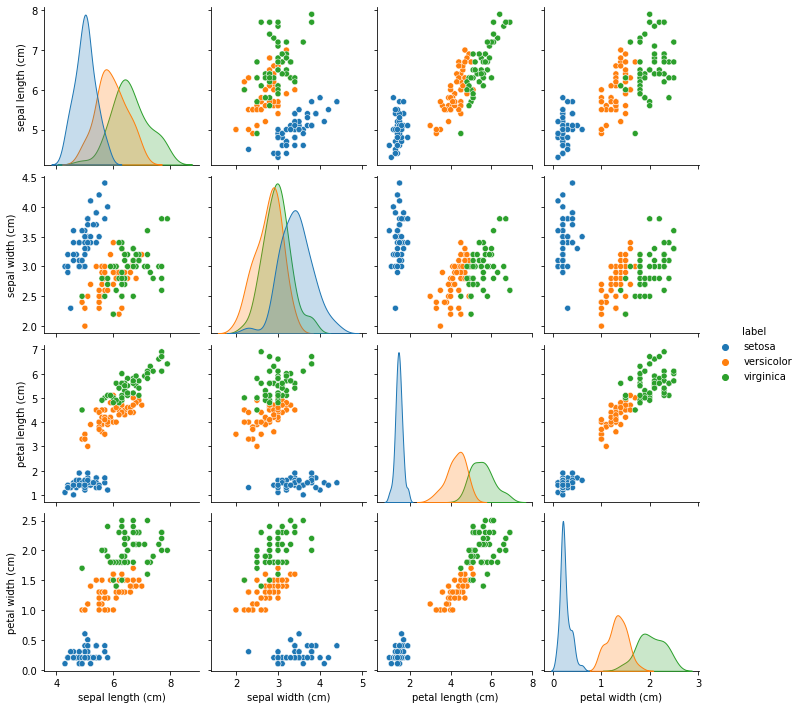

In [ ]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = [iris.target_names[i] for i in iris.target]
sns.pairplot(df, hue = 'label')

In [ ]:
features = df.drop(['label'], axis=1)
#Normaling data
scaler = MinMaxScaler() 
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
data = features
labels = df.label.unique()
instances = df['label'].unique()
instances.shape[0]
#Tranforming the data for numerical values
df['label'].replace(df['label'].unique(),
                        [0,1,2], inplace=True)
target = df['label'].values


Text(0.5, 1.0, 'Correation Map')

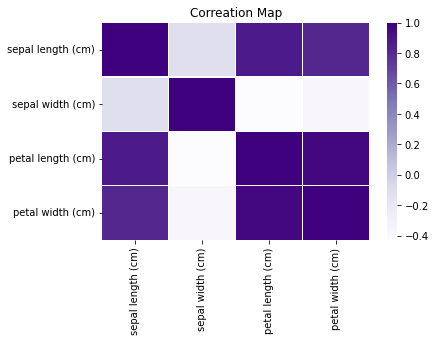

In [ ]:
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Purples")
plt.title('Correation Map')

In [ ]:
# Models Paramentes 🎛️
sigma          = [.01,0.5,1,1.5,2,
                  .01,0.5,1,1.5,2,
                  .01,0.5,1,1.5,2,
                  .01,0.5,1,1.5,2,
                  .01,0.5,1,1.5,2,]
learning_rate  = [.01,.01,.01,.01,.01,
                  .25,.25,.25,.25,.25,
                  0.5,0.5,0.5,0.5,0.5,
                  0.75,0.75,0.75,0.75,0.75,
                  2,2,2,2,2]
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 5000

#Plor Paramenters 
color_map = 'Purples'
markers = ['*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P",'*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*"]
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

n_rows    = 5
n_columns = 5

fig_x = 22
fig_y = 22

## Som 3x3

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 3, 3
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_iris33 = [] 
for i in range(len(sigma)):
  som_iris33.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_iris33[i].random_weights_init(data.values)
  som_iris33[i].train_random(data.values, epochs)

### Hitmap

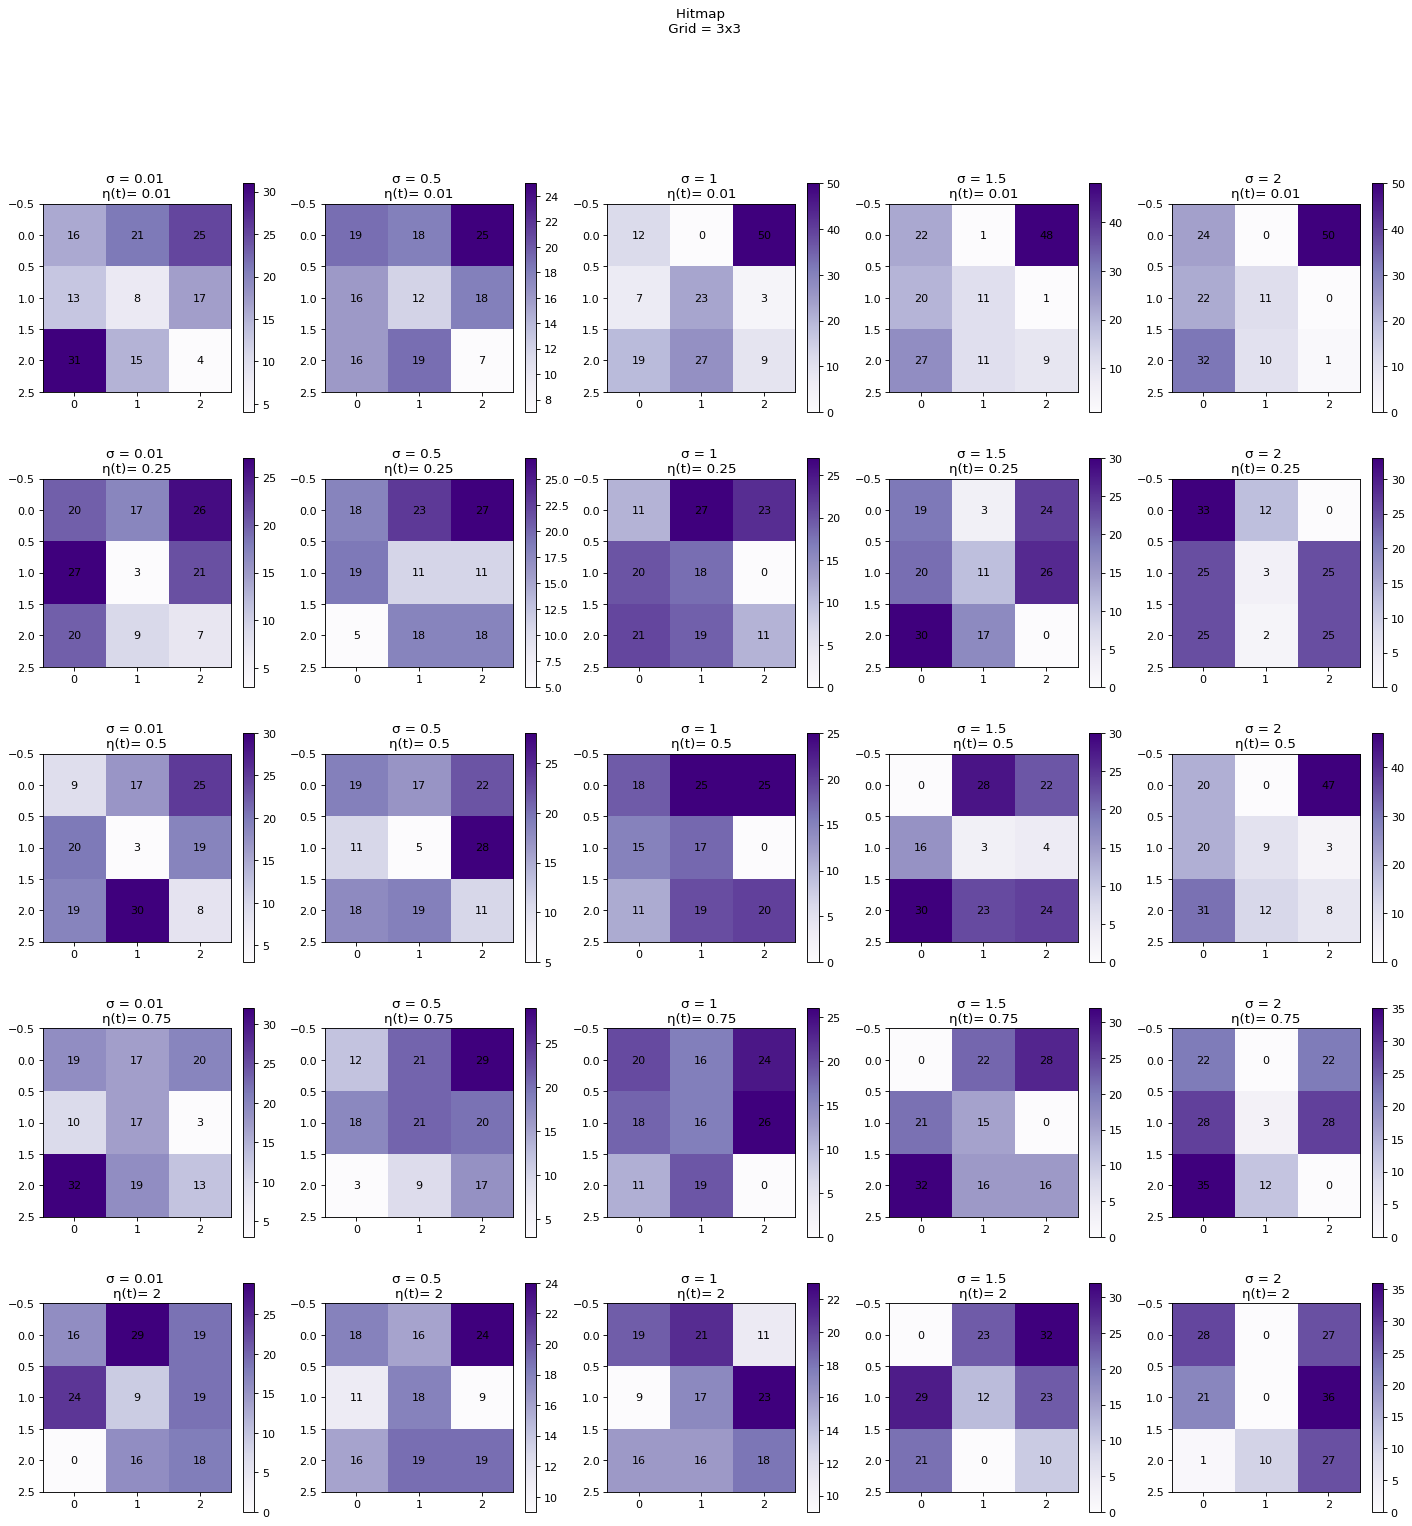

In [ ]:
#i = 0 
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
plt.show()

### U-Matrix

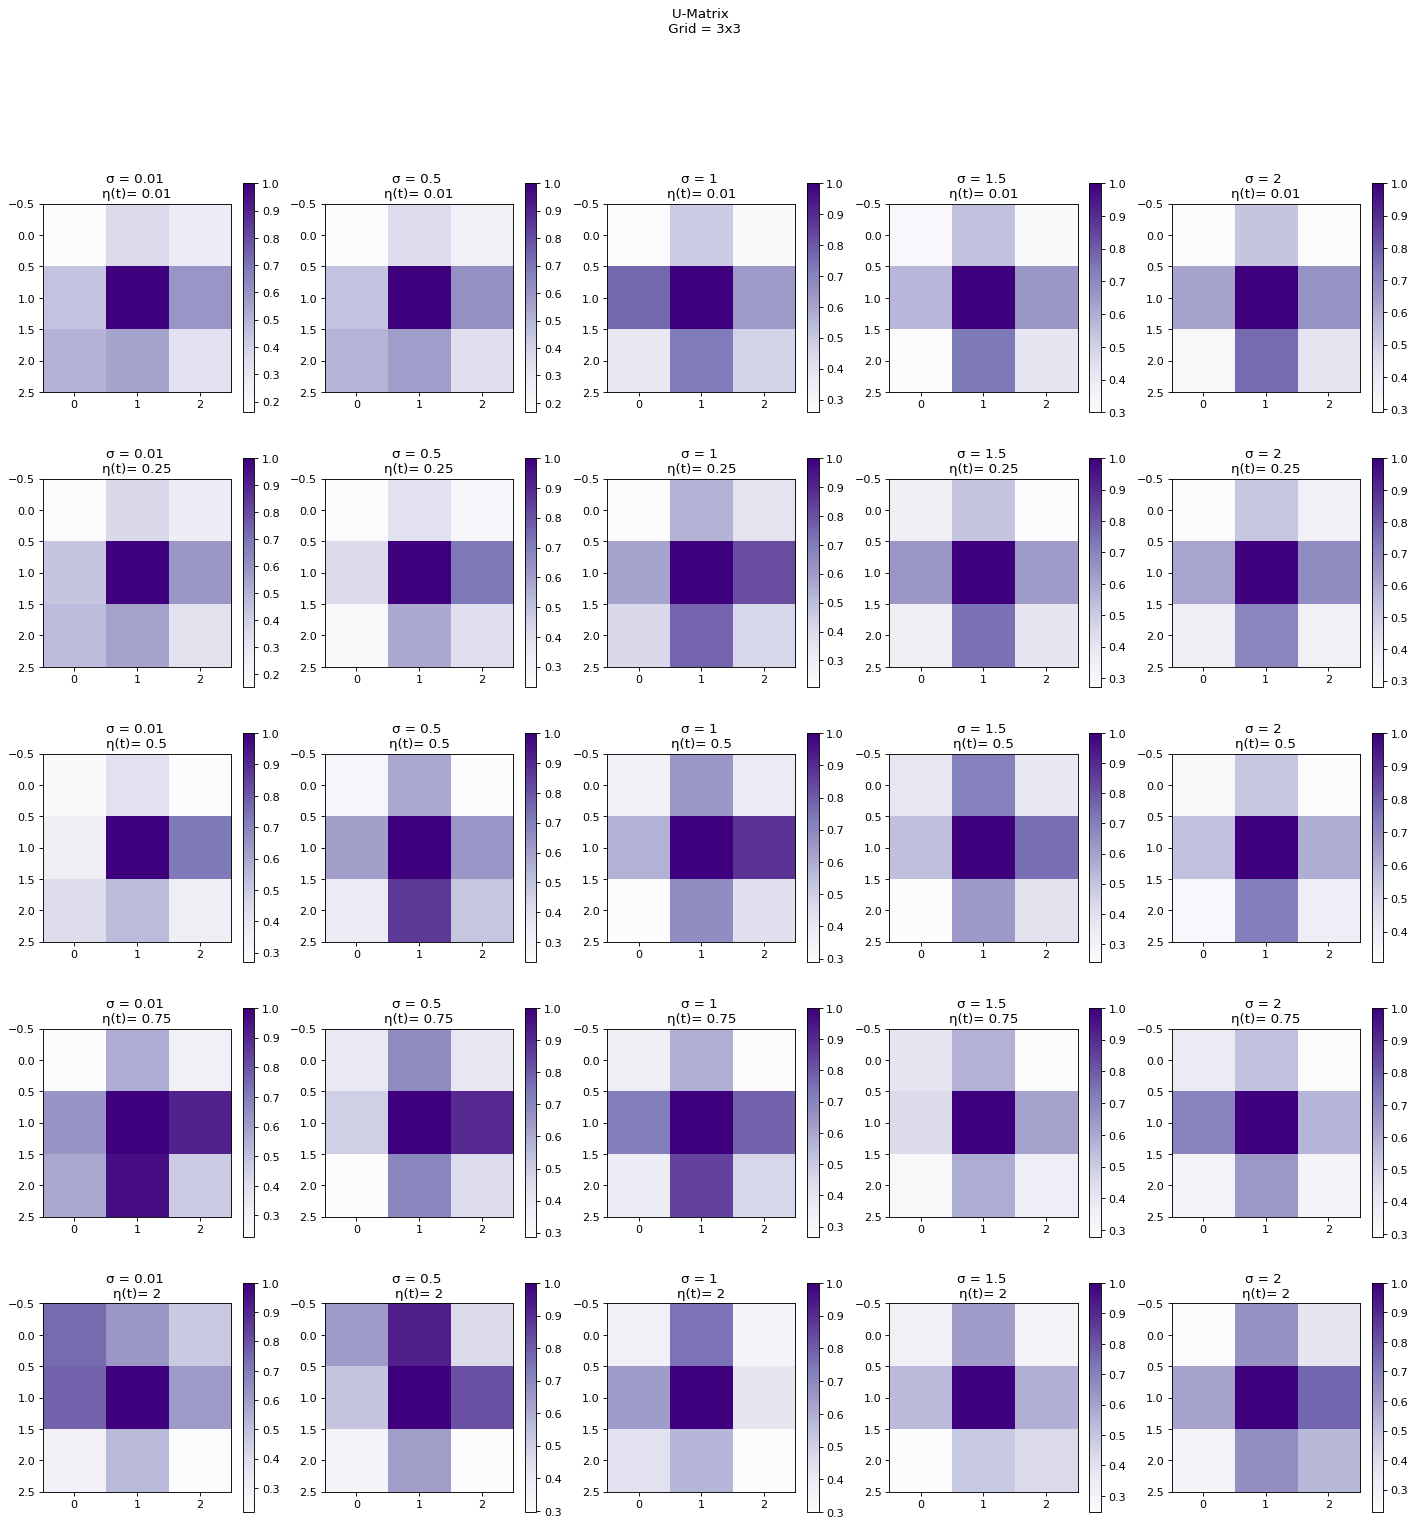

In [ ]:
#i = 0 
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

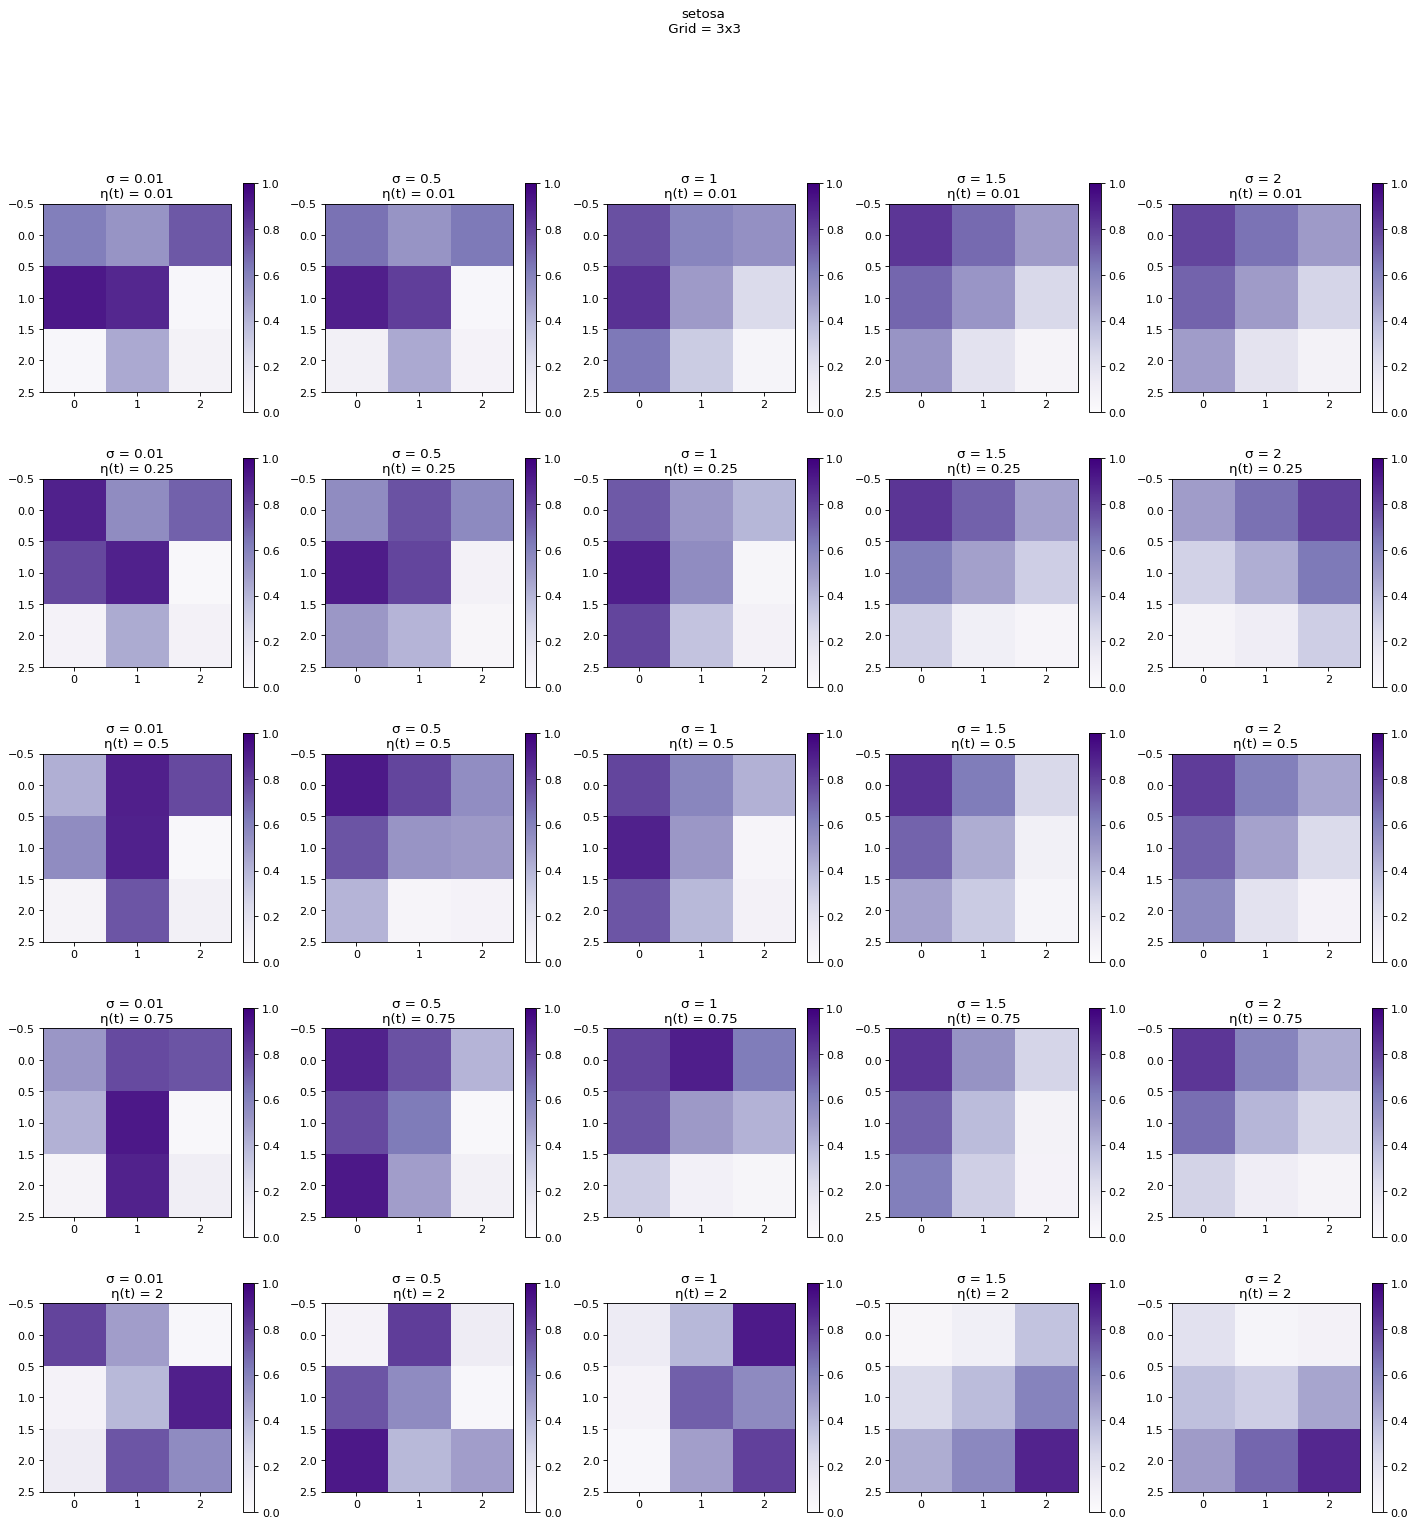

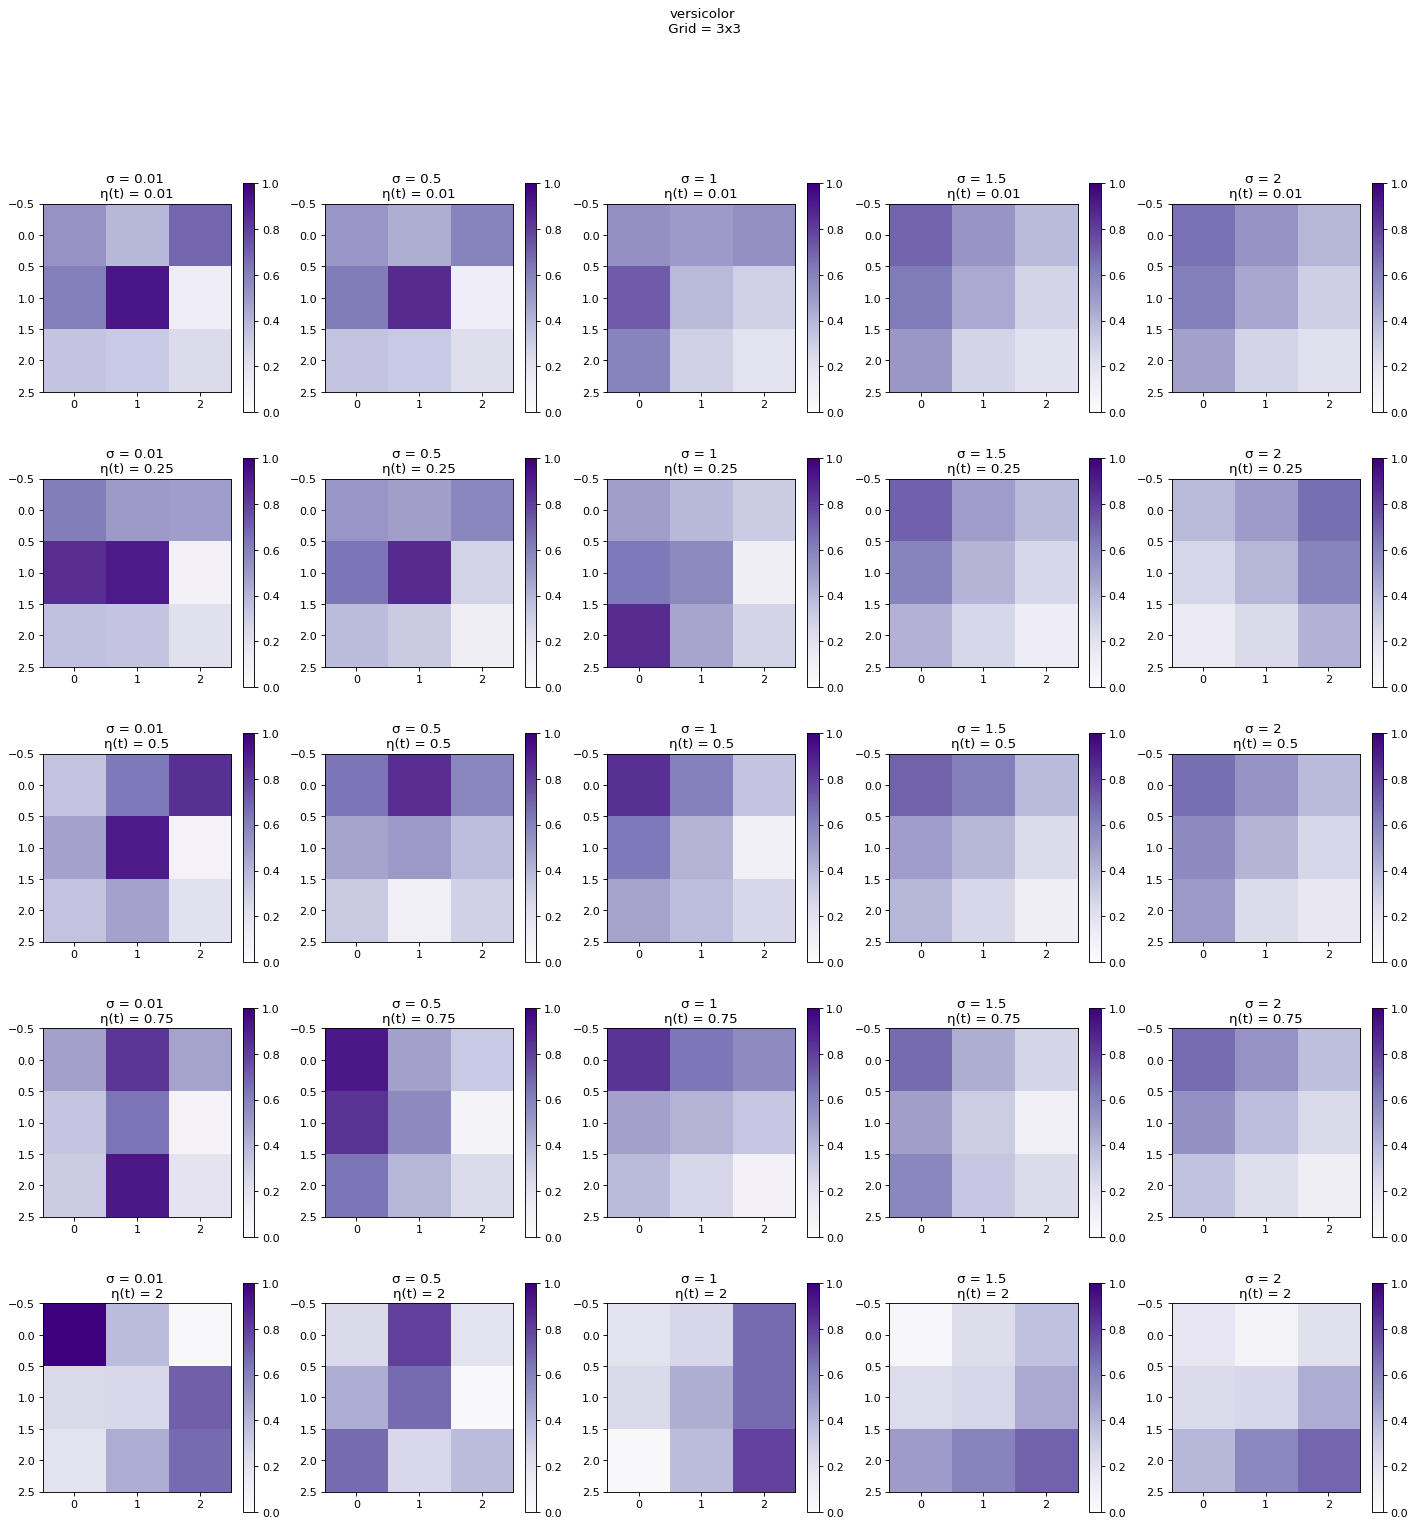

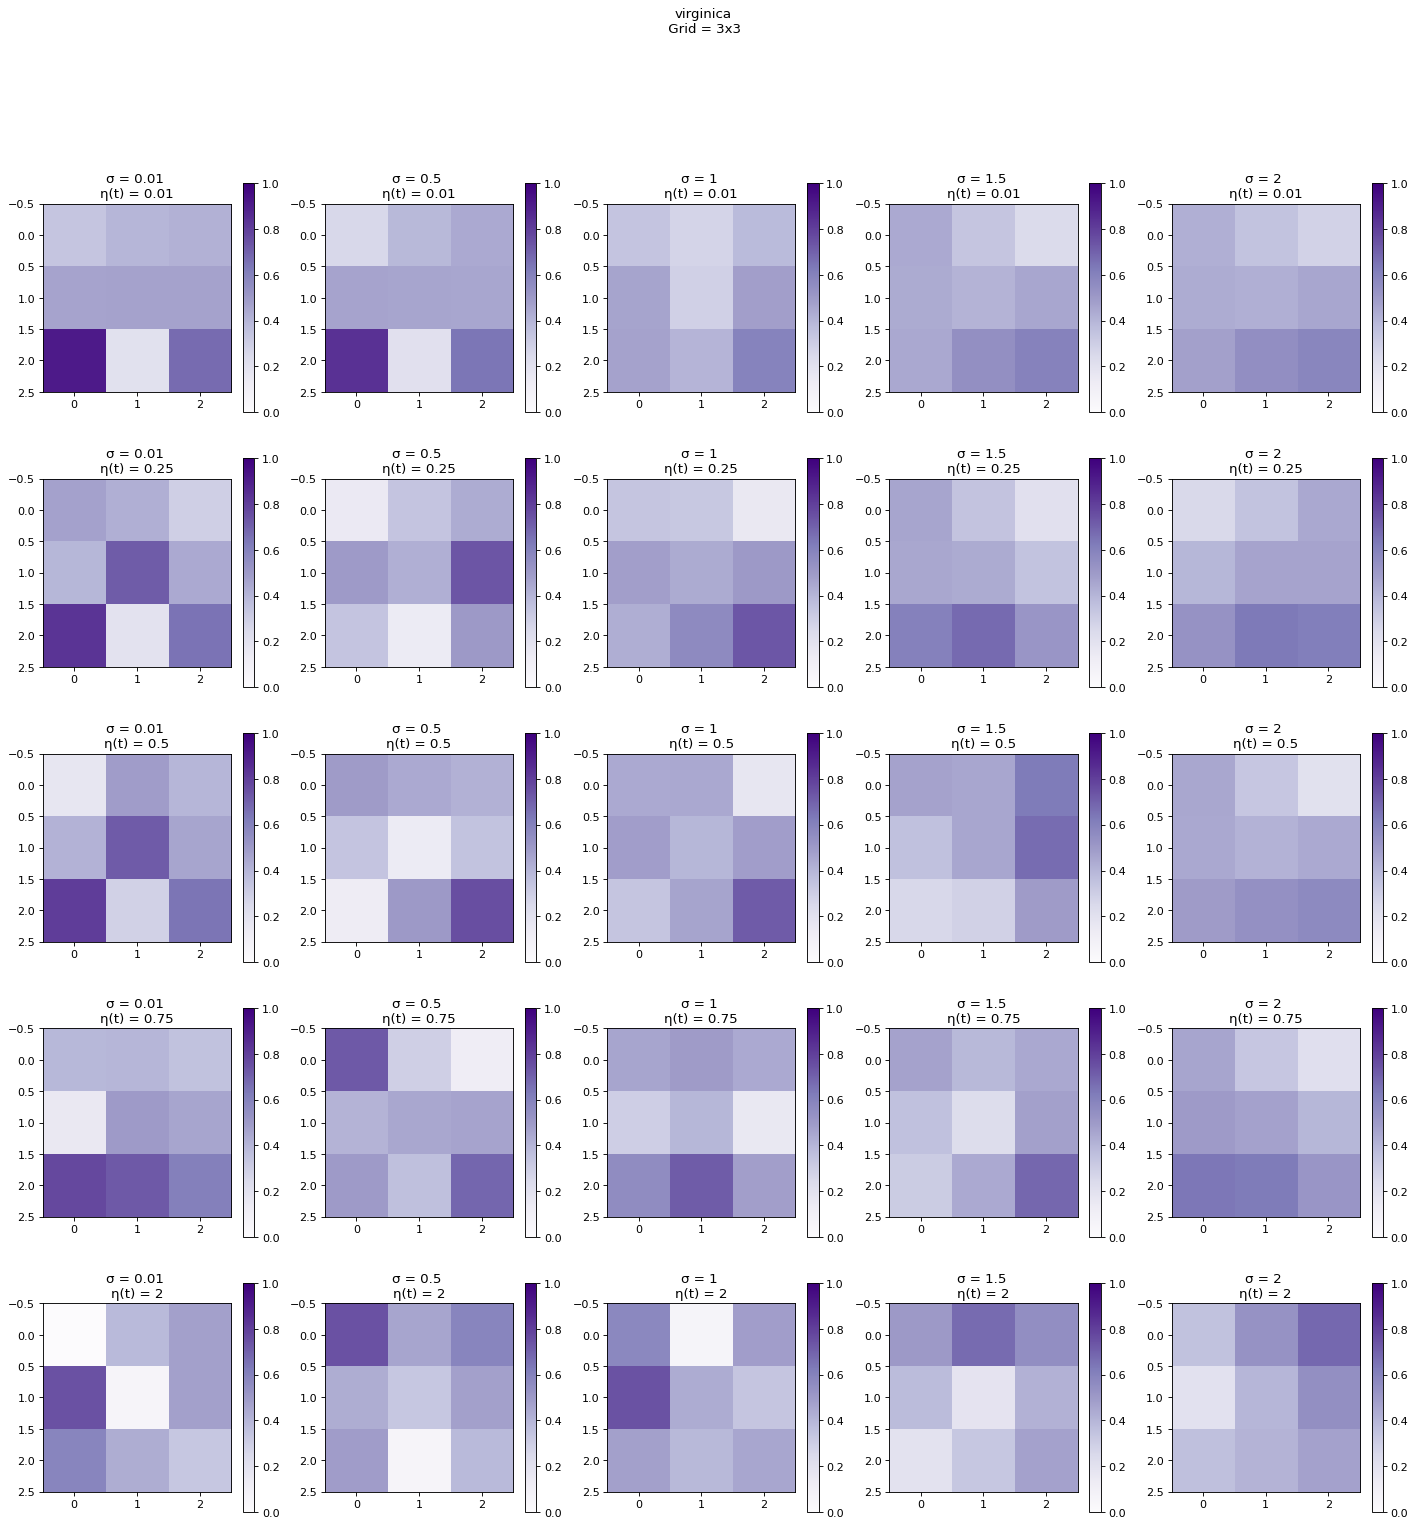

In [ ]:
for l in range(len(labels)):
  figure( figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_iris33[k]
    weights = som.get_weights()

    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map,vmin=0,vmax=1)
    plt.colorbar() #for plot the bar
  plt.show()

### Seeds map
> Its possible to plot this in a grid way? Just like a have made in other plots



<Figure size 960x960 with 0 Axes>

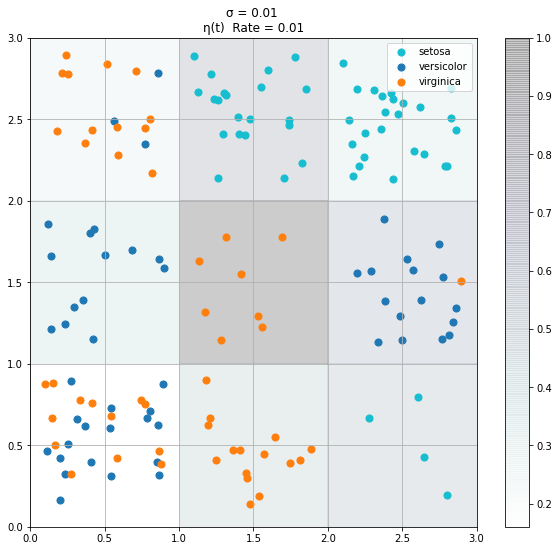

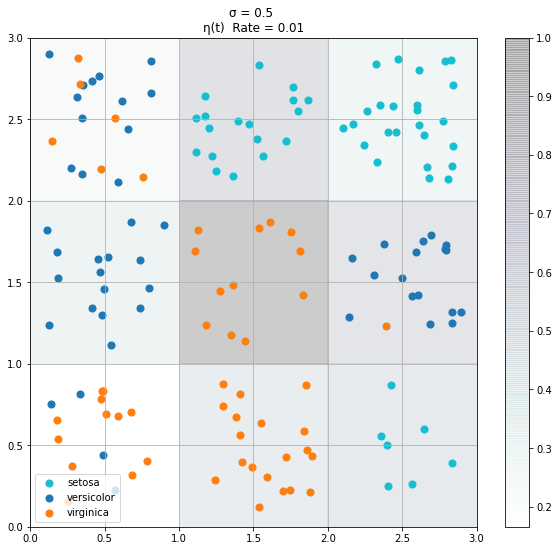

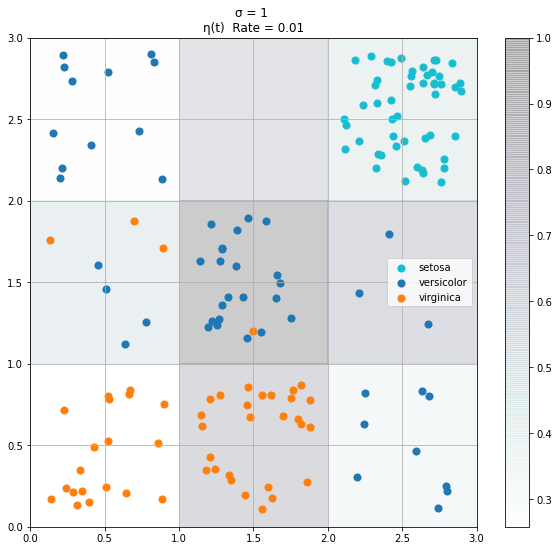

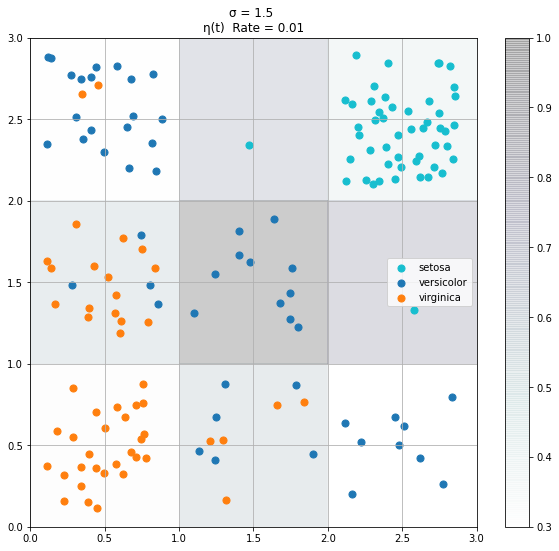

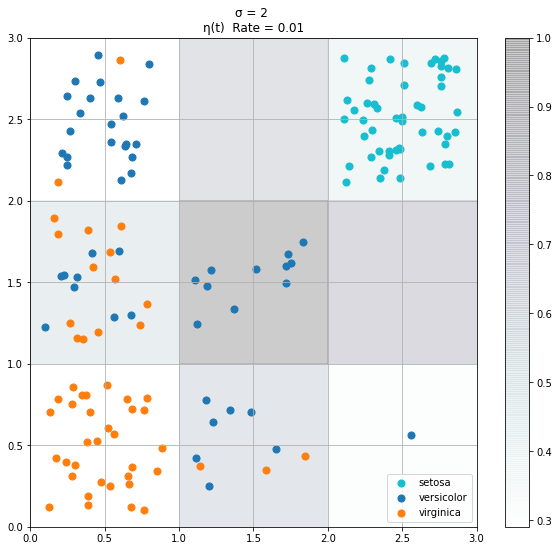

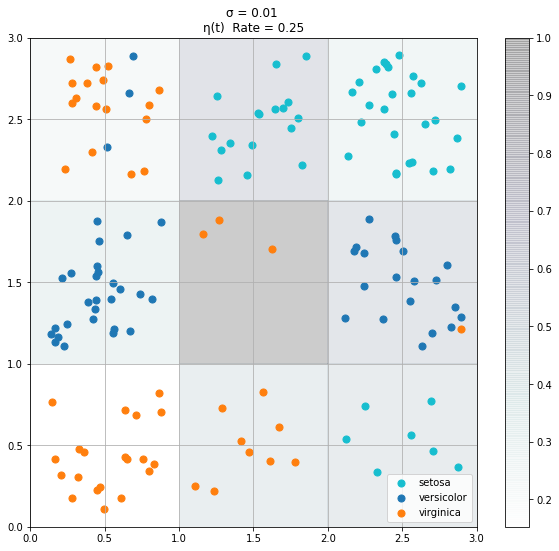

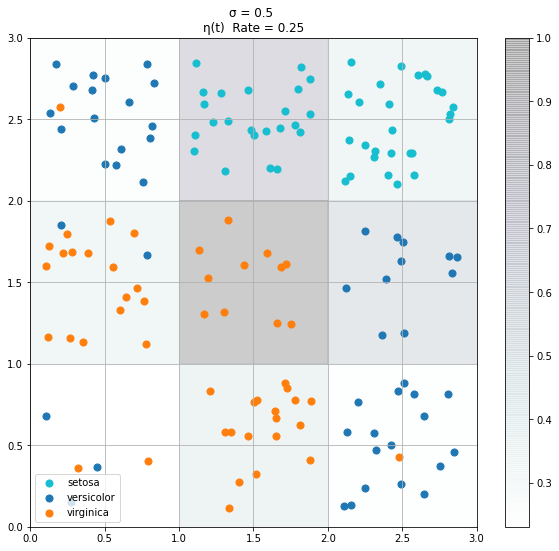

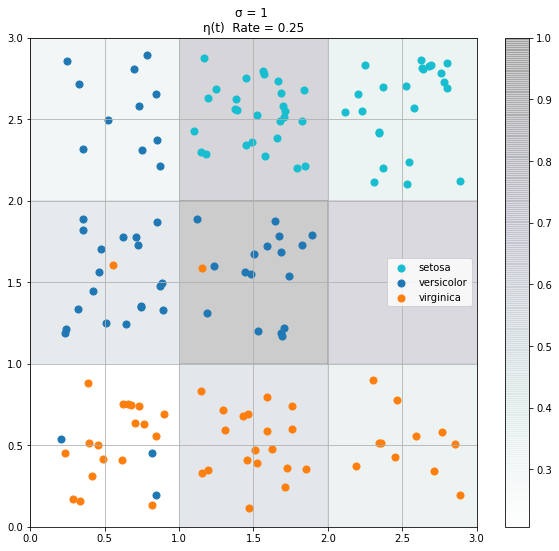

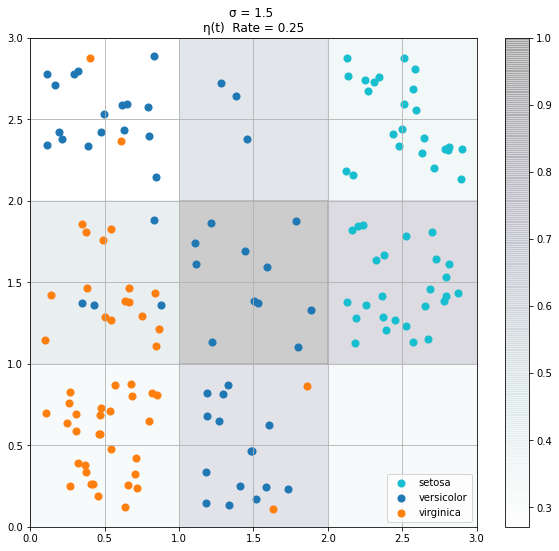

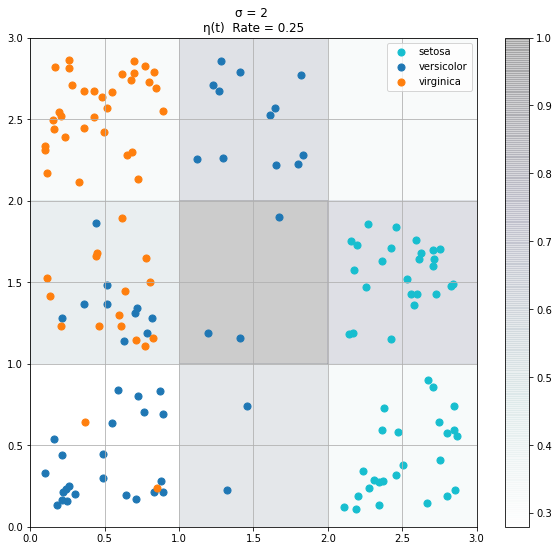

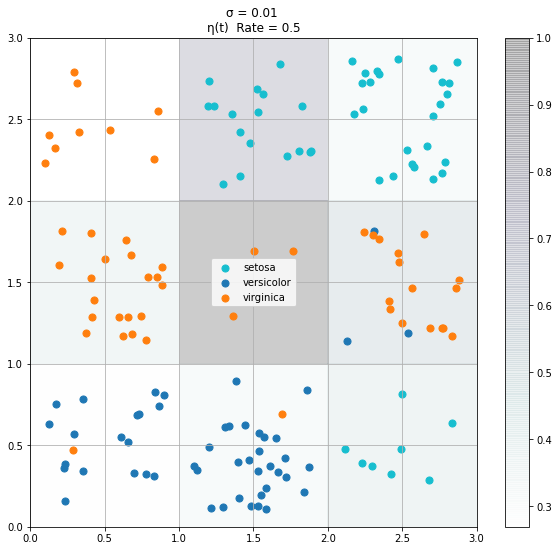

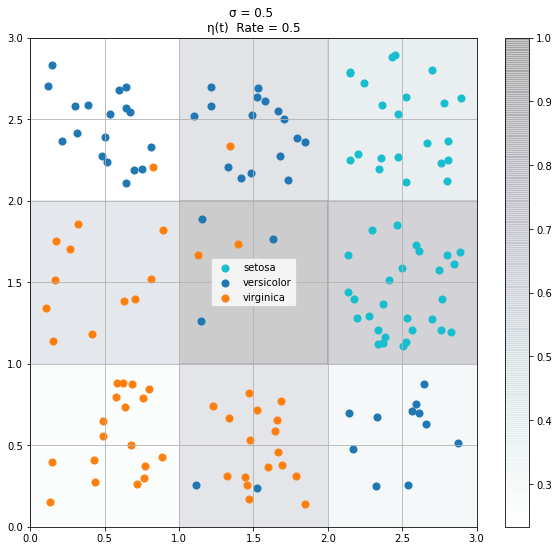

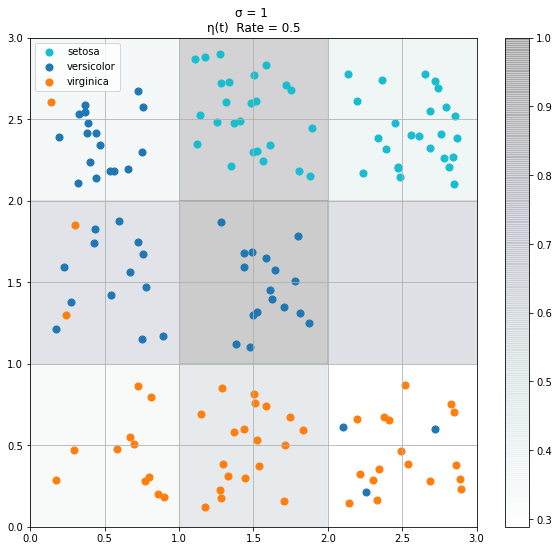

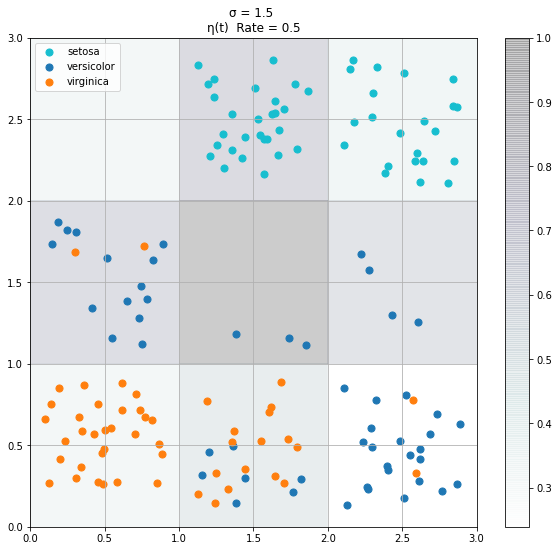

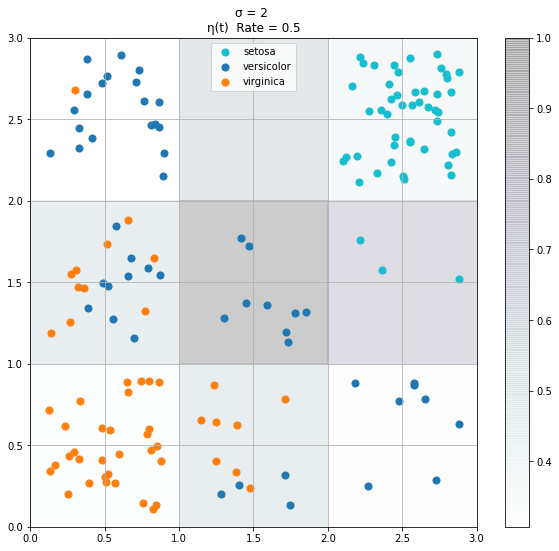

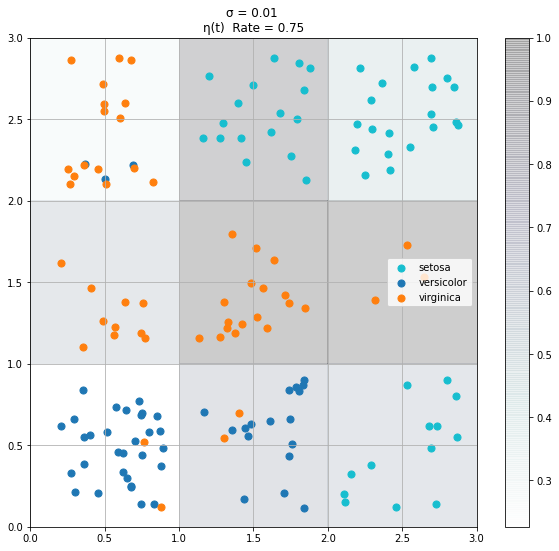

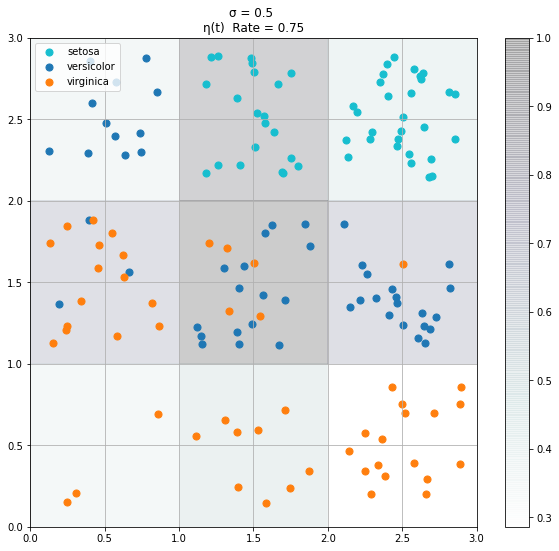

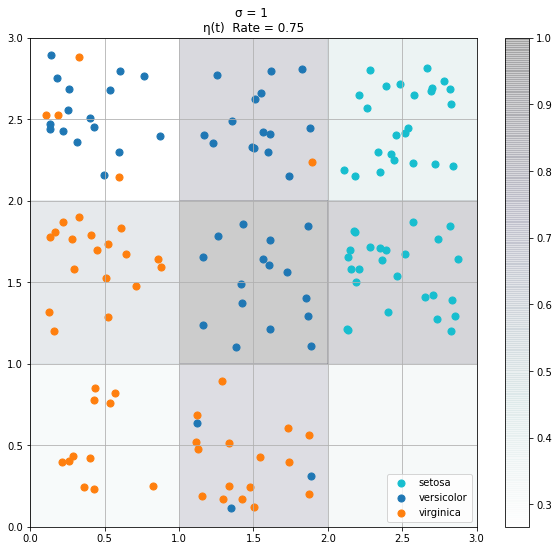

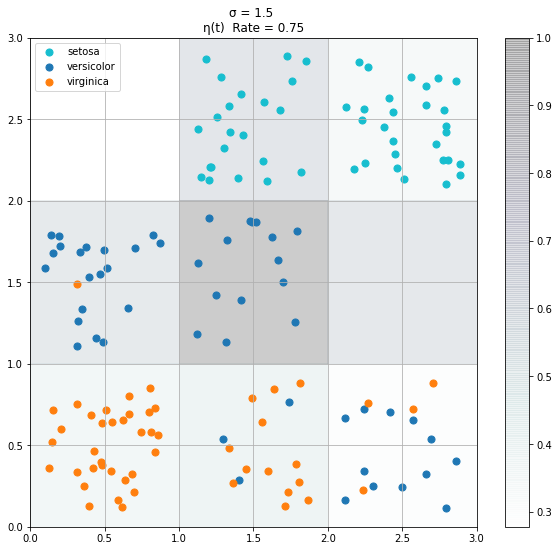

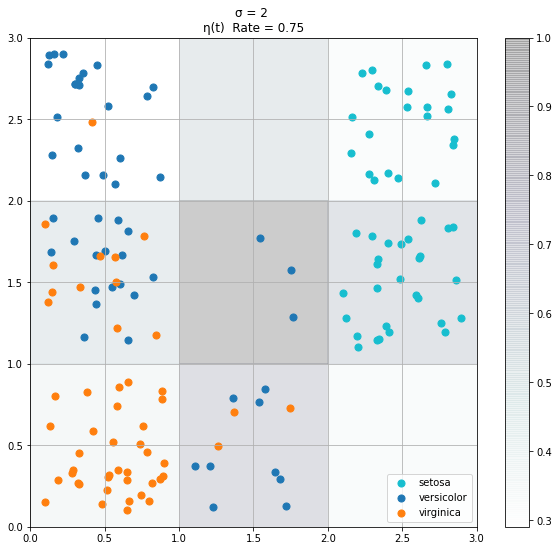

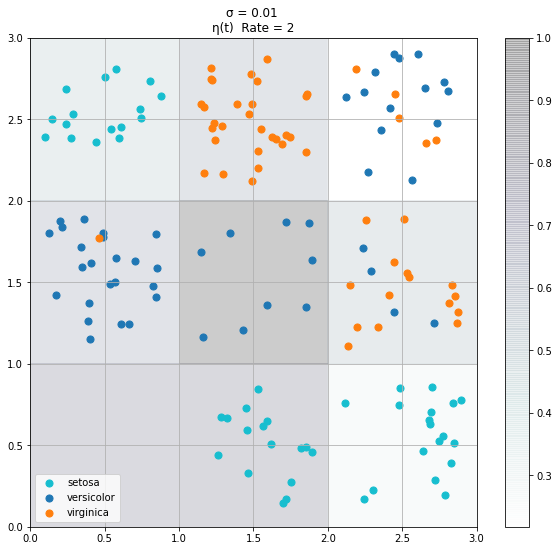

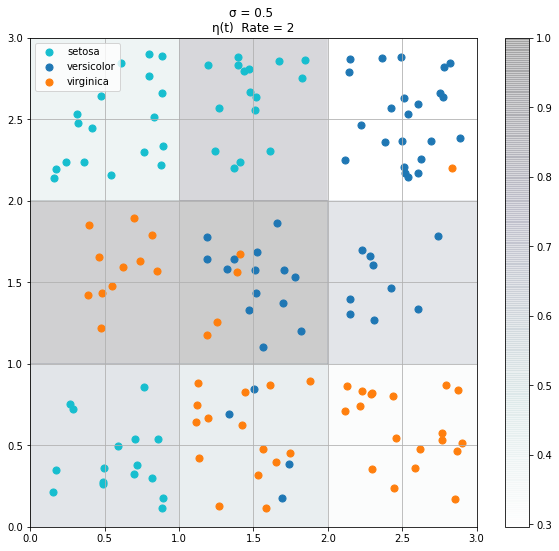

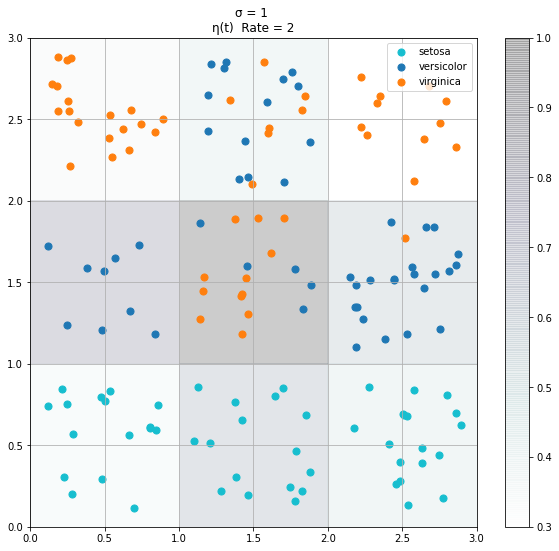

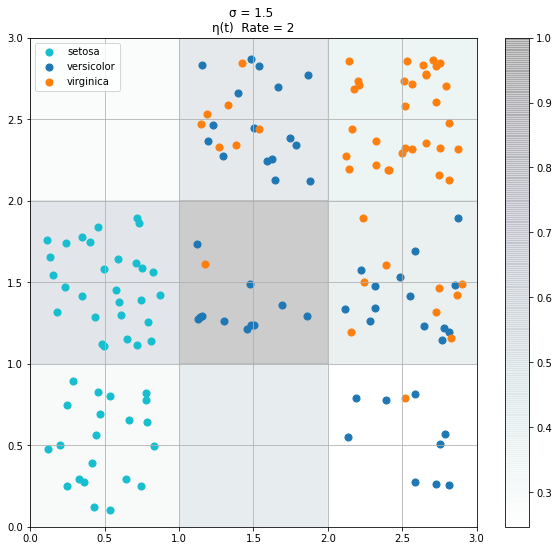

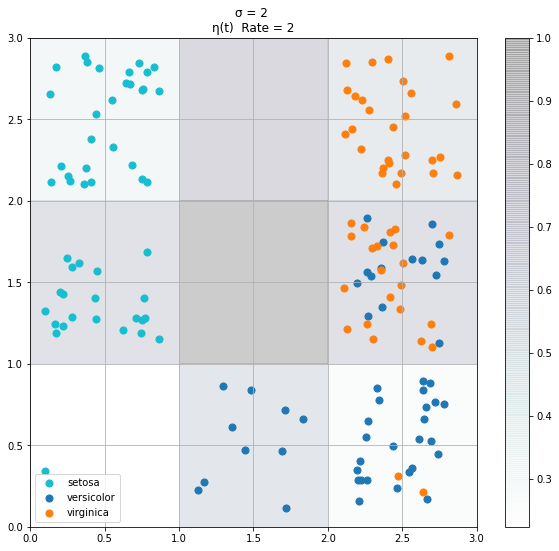

In [ ]:
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, 
                  c=colors[c-1], 
                  label=label_names[c]
                  )
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### Starburst Gradient visualization

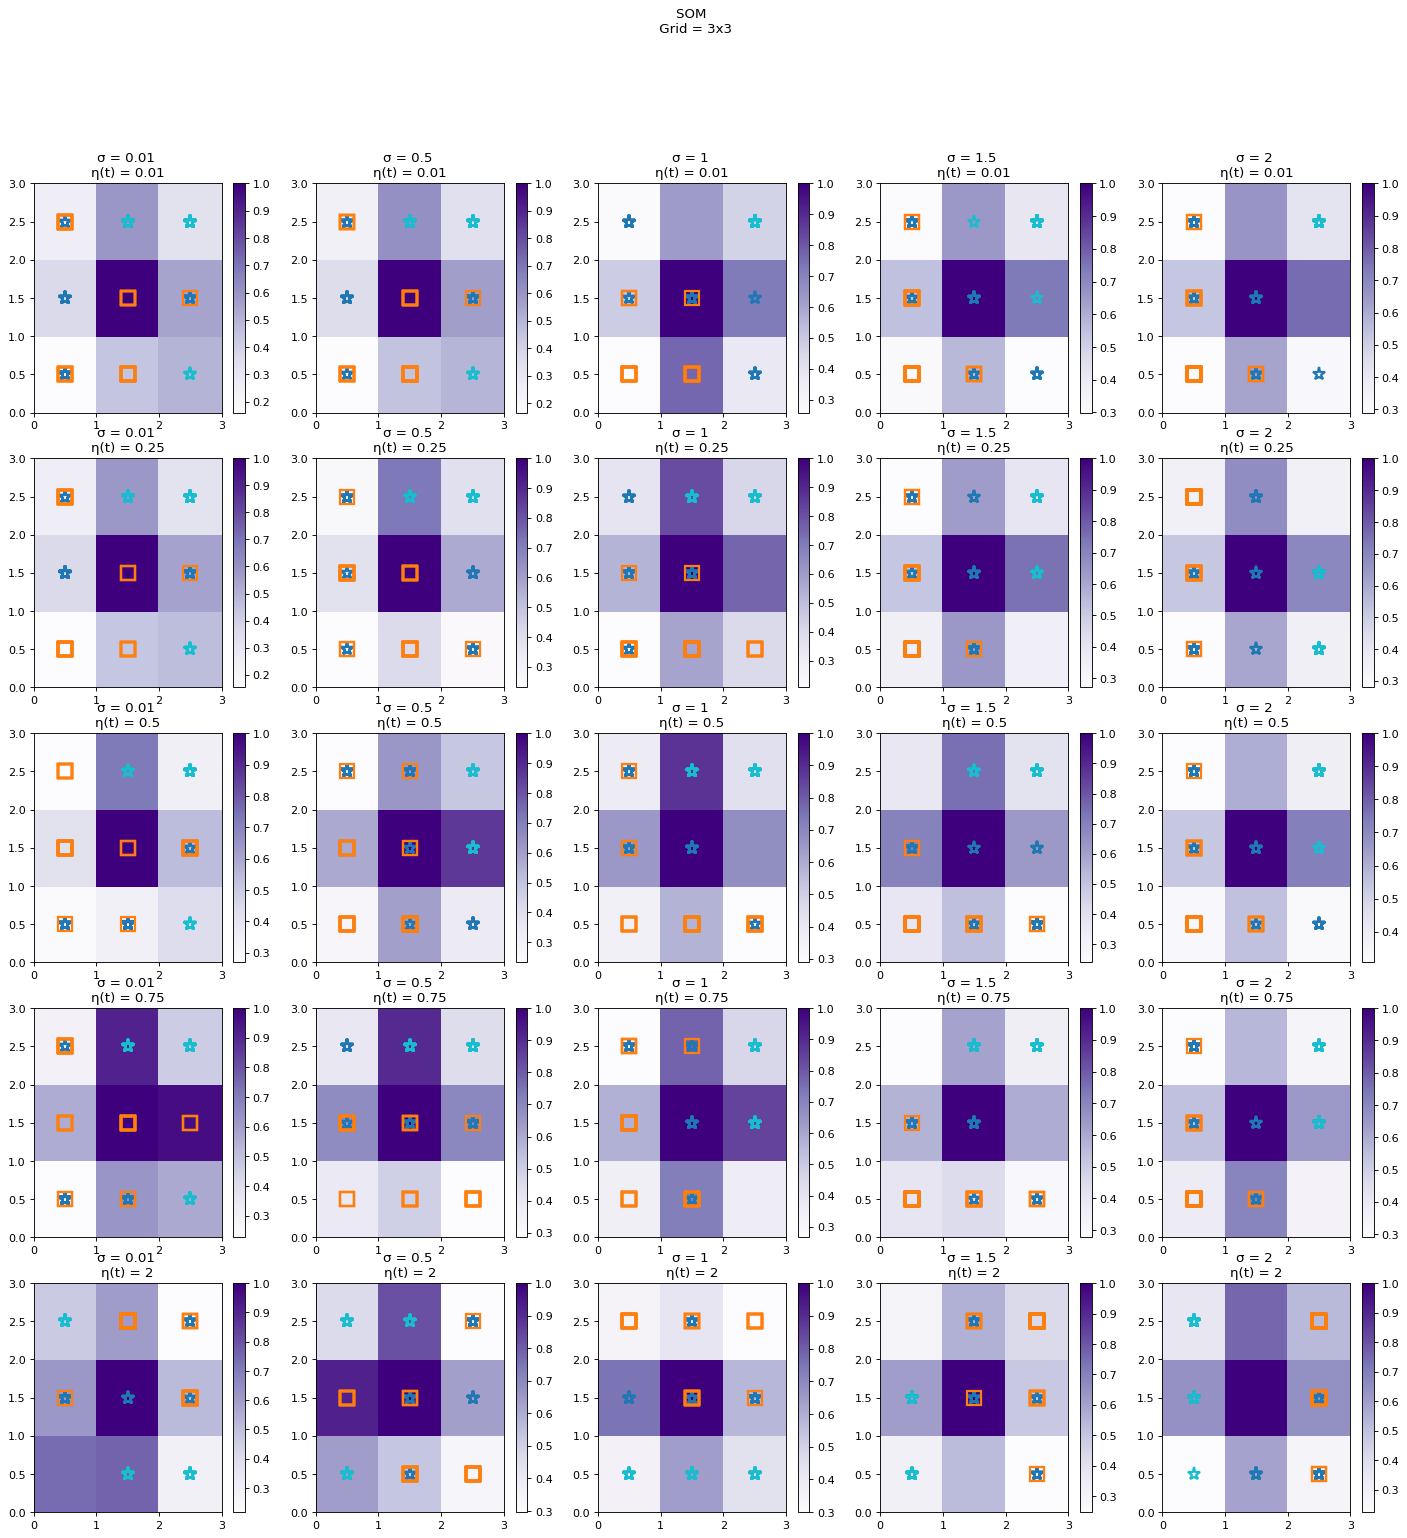

In [ ]:
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_iris33[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,
               markers[target[cnt]-1],
               markerfacecolor='None',
               markeredgecolor=colors[target[cnt]-1],
               markersize=12, 
               markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Error Evaluation

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + inp

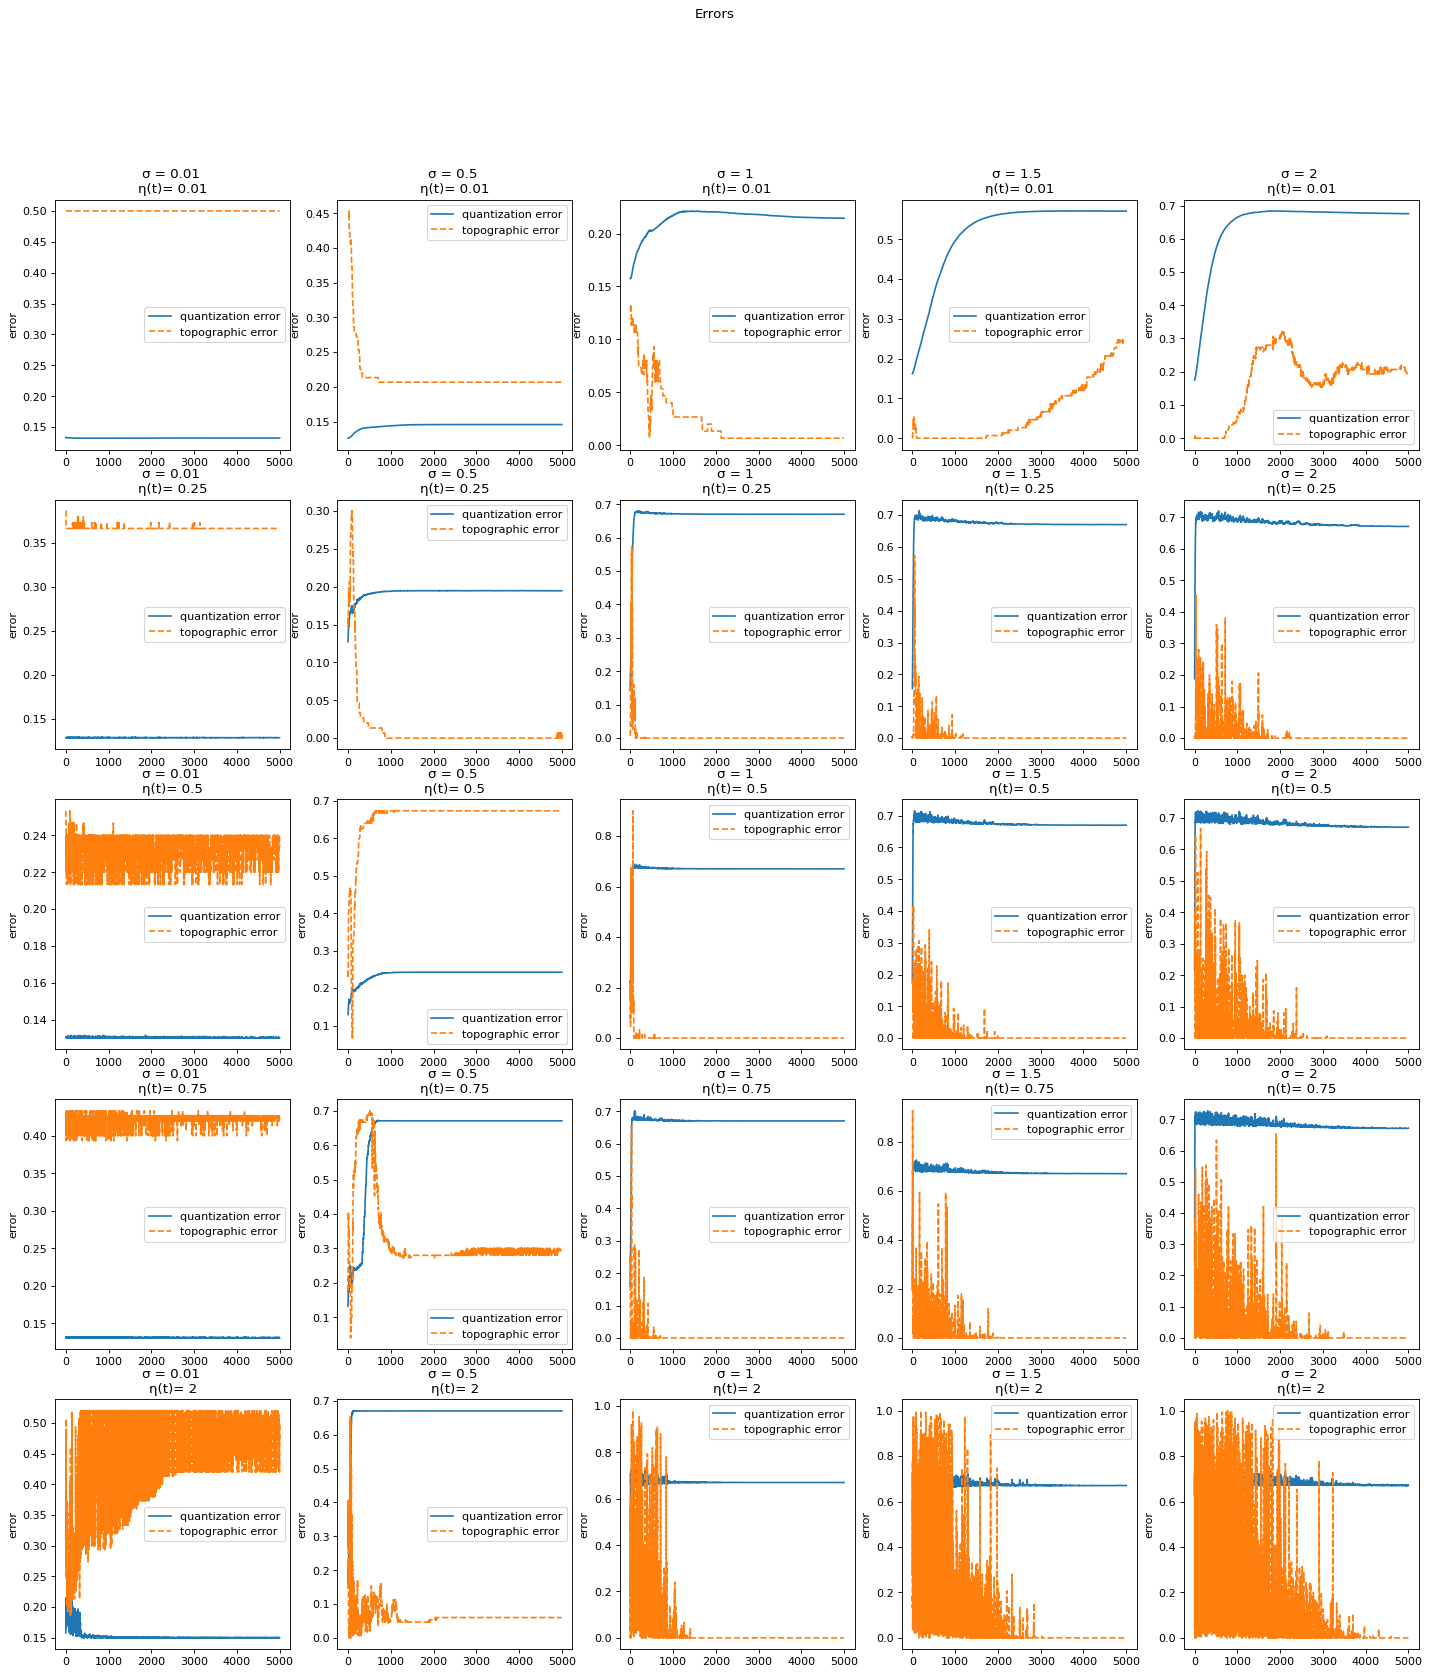

In [ ]:
figure(figsize=(fig_x, fig_y+2),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
  som = som_iris33[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error')
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,linestyle='--')
  plt.ylabel('error')
  #plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)

https://www.w3schools.com/python/python_classes.asp

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73?gi=21e42fd28916

https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto4-autoencoder

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder


